In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
plt.style.use("fivethirtyeight")

In [2]:
#Definamos el conjunto unidimensional de cantor
def cantor(n): #esta funcion ingresa la cant. iteraciones
    C=np.array([0,1]) #empiezo con 0 y 1
    for i in range(n): #en cada iteracion
        Cnew=np.concatenate((C/3,C/3+2/3)) #creo dos copias del anterior reescaleadas 1/3, una trasladada 2/3 y las uno 
        C = np.array([x for x in Cnew]) #defino el actual como el anterior para seguir iterando
    return Cnew

cantidad de puntos:2048


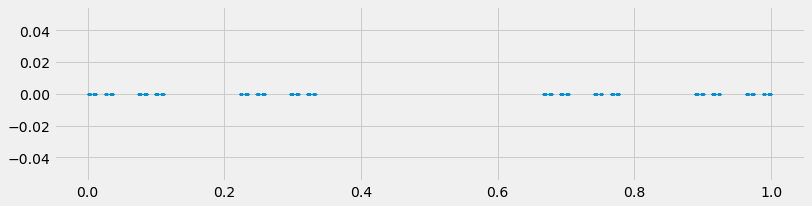

In [3]:
Can=cantor(10) #hagamos 10 iteraciones
print("cantidad de puntos:"+str(len(Can))) #veamos cuantos puntos conforman el conjunto 
fig=plt.figure(figsize=(12,3))
plt.scatter(Can,np.zeros_like(Can),s=1) #plot, np.zeros_like(A) crea un array de ceros con el mismo tamaño del arreglo A
plt.show()

cantidad de puntos:16384


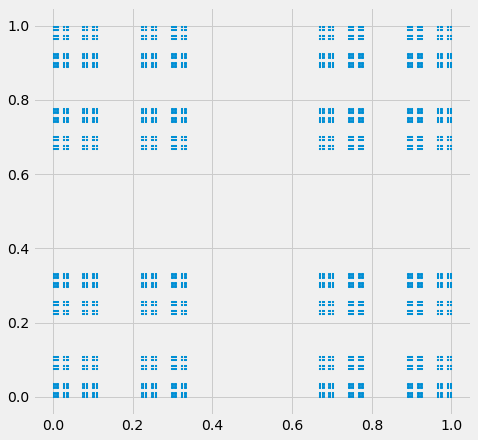

In [4]:
#hagamos el conjunto 2D
Can2d_x=np.array([x for x in cantor(6) for y in cantor(6)]) #este es el arreglo de componentes x
Can2d_y=np.array([y for x in cantor(6) for y in cantor(6)]) #este es el arreglo de componentes y
print("cantidad de puntos:"+str(len(Can2d_x))) #veamos cuantos puntos conforman el conjunto 
fig=plt.figure(figsize=(7,7))
plt.scatter(Can2d_x,Can2d_y,s=0.3) #plot
plt.show()

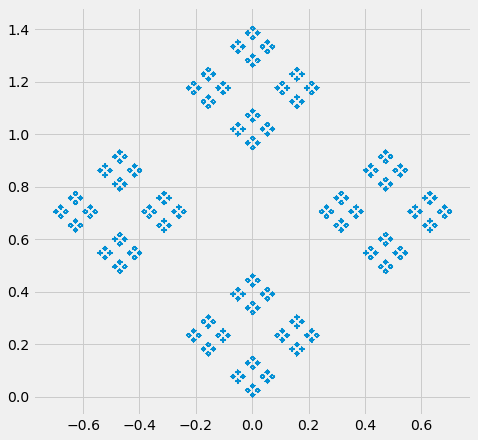

In [5]:
#hagamos el conjunto 2D rotado en theta
theta=np.pi/4 #defino el angulo
Canrot_x=np.array([x*np.cos(theta)-y*np.sin(theta) for x in cantor(6) for y in cantor(6)])
Canrot_y=np.array([x*np.sin(theta)+y*np.cos(theta) for x in cantor(6) for y in cantor(6)])
fig=plt.figure(figsize=(7,7))
plt.scatter(Canrot_x,Canrot_y,s=0.3) #plot
plt.show()

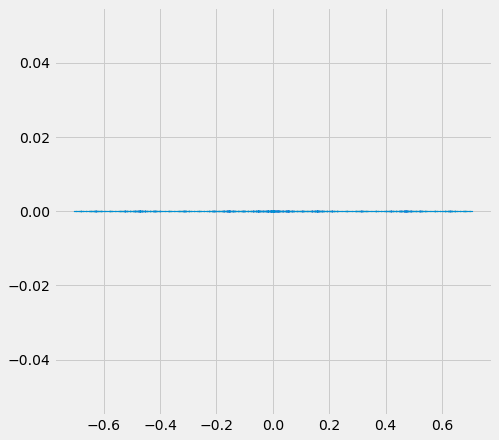

In [6]:
#su proyeccion en el eje x es simplemente la componente x
fig=plt.figure(figsize=(7,7))
plt.scatter(Canrot_x,np.zeros_like(Canrot_x),s=0.3) #plot
plt.show()

In [24]:
#ahora midamos la dimensión de BoxCounting de este conjunto
def Nk(k,A):
    minA=np.amin(A)
    maxA=np.amax(A)
    d=(maxA-minA)*2**(-k) #delta es la longitud del conjunto dividida 2^k
    Count=np.zeros(2**k,dtype=int) #creo 2^k "cajas" pero aún no contaron nada
    for j in range(2**k): #para cada caja j
        if (np.any((A>minA+j*d)*(A<=minA+(j+1)*d))): #si hay aunque sea un punto de A en la caja j
            Count[j]=1 #esa caja vale 1
    return np.sum(np.array(Count)) #sumar sobre las cajas cuenta cuantas hay en total
#que es A>np.amin(A)+j*d ?? estoy comparando un arreglo entero ??
#es un arreglo de la longitud de A, que en cada elemento tiene valores True o False dependiendo
#de si ese elemento cumple la condición o no
#(A>minA+j*d)*(A<minA+(j+1)*d) es un arreglo que tiene True solo cuando cumple ambas condiciones
#np.any devuelve True si algun elemento del array es True

In [25]:
Nk(3,Canrot_x) #por ejemplo para 8 cajas de un octavo del intervalo de largo, cuento:

8

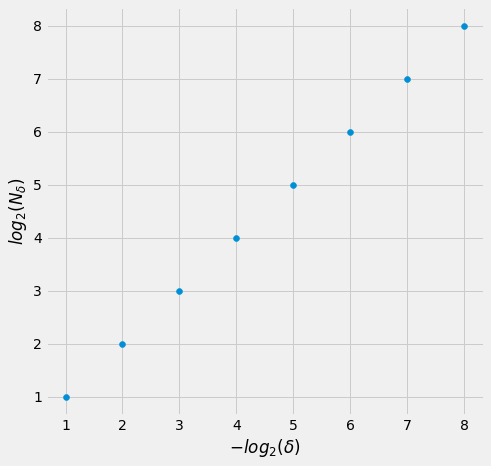

In [39]:
#hagamos un vector con todos los Nk
Nks=[Nk(i,Canrot_x) for i in range(1,9)]
fig=plt.figure(figsize=(7,7))
plt.scatter(range(1,9),np.log2(np.array(Nks))) #plot log delta vs log N delta
plt.xlabel(r'$-log_2(\delta)$')
plt.ylabel(r'$log_2(N_\delta)$')
plt.show()

In [40]:
#claramente tiene pendiente 1, pero si quisieramos comprobar
pendiente,ordenada,_,_,error=linregress(range(1,9),np.log2(np.array(Nks)))
print("pendiente obtenida:",pendiente,"mas menos",error)

pendiente obtenida: 1.0 mas menos 0.0


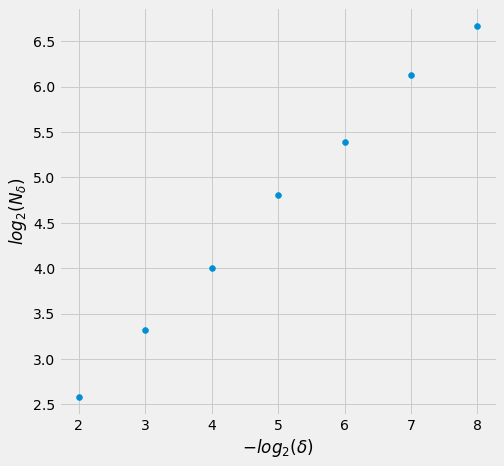

In [41]:
#también podríamos intentar ver el conjunto de cantor original como da:
Nks=[Nk(i,Can) for i in range(3,10)] #pero ignoro los primeros 2 puntos por que dan feos
fig=plt.figure(figsize=(7,7))
plt.scatter(range(2,9),np.log2(np.array(Nks))) #plot log delta vs log N delta
plt.xlabel(r'$-log_2(\delta)$')
plt.ylabel(r'$log_2(N_\delta)$')
plt.show()

In [42]:
pendiente,ordenada,_,_,error=linregress(range(3,10),np.log2(np.array(Nks)))
print("pendiente obtenida:",pendiente,"mas menos",error)

pendiente obtenida: 0.6881934210944638 mas menos 0.013498945839209575


In [43]:
print("exacta:",1/np.log2(3))

exacta: 0.6309297535714575
